In [2]:
try:
    import ngspyce as ns
except ModuleNotFoundError as e:
    pass

from pathlib import Path
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import handlers
import importlib; importlib.reload(handlers)

Project directory doesn't exist :(


<module 'handlers' from 'e:\\Descargas\\ic_analog\\tareas\\Proyecto-IPD413\\Xschem\\handlers.py'>

##### WARNING

In [17]:
import shutil; shutil.rmtree(handlers.data_dir)

# OTA Analysis

### Stability Analysis

In [5]:
data = {}

ota_schematic = handlers.project_dir / "test-ota.spice"
ns.source(ota_schematic)

ns.cmd("save frequency v(out)")
ns.cmd(f"alter vin AC=1")

handlers.ns_log(False)
ns.ac("dec", 100, 1, 1.9*1e7)
handlers.ns_log(False)

print(ns.vector_names())

data[f"freq"] = np.abs(ns.vector('frequency'))
data[f"v(out)"] = ns.vector('v(out)')

handlers.numpy_store_data(data, "stability.npz")

NameError: name 'ns' is not defined

dict_keys(['freq', 'v(out)'])


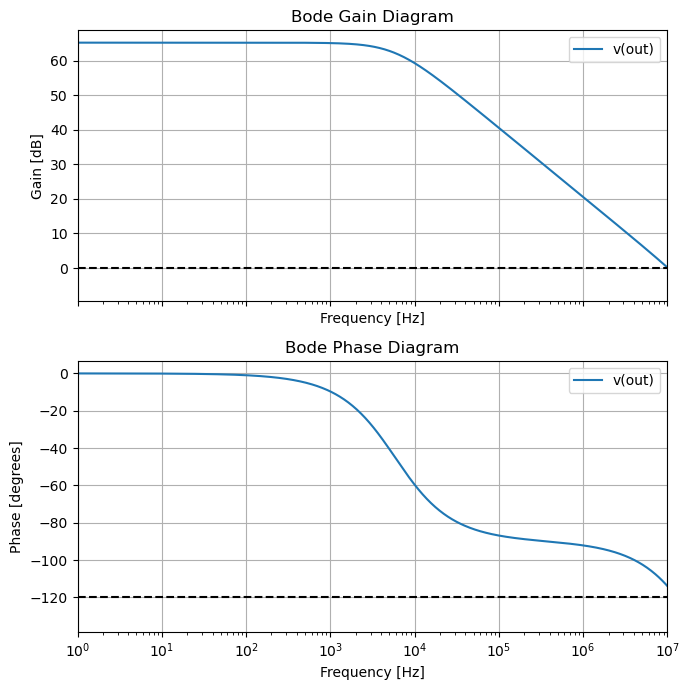

In [6]:
data = handlers.numpy_get_data("stability.npz")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7), sharex=True)
handlers.plt_add_bode(ax1, ax2, data, 1e7)
fig.tight_layout()